In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#torchvision package
import torchvision

In [0]:
trainset = torchvision.datasets.CIFAR10(root = './data',train = True,
                                       download = True, transform = torchvision.transforms.ToTensor())
#transform --> transform the data during creation

0it [00:00, ?it/s]

100%|█████████▉| 170033152/170498071 [00:14<00:00, 12009078.41it/s]

In [0]:
#class labels
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship',' truck' )

In [0]:
type(trainset)

torchvision.datasets.cifar.CIFAR10

In [0]:
#loading the dataset --> DataLoader class (torch.utils.data.DataLoader)
trainloader = torch.utils.data.DataLoader(trainset)

In [0]:
data_iter = iter(trainloader)
type(data_iter)

torch.utils.data.dataloader._DataLoaderIter

In [0]:
#Access the data --> next() method
images,labels = data_iter.next()
print(images.shape)

torch.Size([1, 3, 32, 32])


(1,3,32,32) -->

1 - Batch Size, 

3 - channels in input,

32,32 - shape of individual image 

In [0]:
print(labels.item())

6


In [0]:
classes[labels.item()]

'frog'

In [0]:
#Specifying batch_size, Shuffle & load data in paralell using multiprocessing workers
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 4, shuffle = True)

data_iter = iter(trainloader)
images,labels = data_iter.next()

In [0]:
print(images.shape)

torch.Size([4, 3, 32, 32])


(4,3,32,32) -->

4 - Batch Size(no. of images loaded), 

3 - channels in input,

32,32 - shape of individual image 

In [0]:
labels

tensor([3, 6, 4, 2])

# Visualize the Data

In [0]:
image_data = images[0]
image_data.shape

torch.Size([3, 32, 32])

In [0]:
#convert to numpy
np_image = image_data.numpy()

In [0]:
np_image.shape

(3, 32, 32)

In [0]:
#transpose
np_image = np.transpose(np_image, (1,2,0))

In [0]:
np_image.shape

(32, 32, 3)

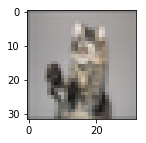

In [0]:
#plotting the image
plt.figure(figsize = (2,2))
plt.imshow(np_image)
plt.show()

In [0]:
print(classes[labels[0].item()])

cat


In [0]:
def image_show(image_data):
  np_image = image_data.numpy()
  np_image = np.transpose(np_image, (1,2,0))
  plt.figure(figsize = (2,2))
  plt.imshow(np_image)
  plt.show()

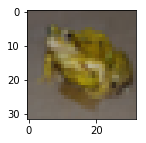

In [0]:
image_show(images[1])

In [0]:
print(classes[labels[1].item()])

frog


# First Convolution Layer

In [0]:
class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN,self).__init__()
    self.conv1 = nn.Conv2d(3,10,3)  # (no. of input channels, number of output channels, kernel size)
    # kernel size --> 3 = (3,3)
  
  def forward(self,x):
    y = self.conv1(x)
    return y

In [0]:
cnn = FirstCNN()

In [0]:
out = cnn(images)

In [0]:
print(out.shape)

torch.Size([4, 10, 30, 30])


(4,10,30,30) -->

4 : number of images (batch size)

10 : Channels in output

(30,30)  : Resultant image Size


**Default:**

Padding = (0,0), Stride  = (1,1)

In [0]:
#image after convolution
sample = out[0,0,:,:]
sample.shape

torch.Size([30, 30])

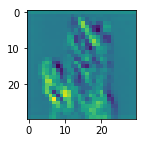

In [0]:
plt.figure(figsize = (2,2))
plt.imshow(sample.detach().numpy())
plt.show()

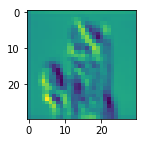

In [0]:
#2nd filter
sample = out[0,1,:,:]
plt.figure(figsize = (2,2))
plt.imshow(sample.detach().numpy())
plt.show()

In [0]:
#Padding & Stride
#By Default: Padding = (0,0) & Stride = (1,1)

class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN,self).__init__()
    self.conv1 = nn.Conv2d(3,10,3, padding = (1,1) )  # Padding = 1,1
    # kernel size --> 3 = (3,3)
  
  def forward(self,x):
    y = self.conv1(x)
    return y

In [0]:
cnn = FirstCNN()

In [0]:
out = cnn(images)

In [0]:
out.shape

torch.Size([4, 10, 32, 32])

In [0]:
#Stride = 1

class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN,self).__init__()
    self.conv1 = nn.Conv2d(3,10,3, padding = (1,1), stride = (1,1) )  # Stride = 1,1
    # kernel size --> 3 = (3,3)
  
  def forward(self,x):
    y = self.conv1(x)
    return y

  
cnn = FirstCNN()
out = cnn(images)
out.shape

torch.Size([4, 10, 32, 32])

In [0]:
#Stride = 2

class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN,self).__init__()
    self.conv1 = nn.Conv2d(3,10,3, padding = (1,1), stride = (2,2) )  # Stride = 2,2
    # kernel size --> 3 = (3,3)
  
  def forward(self,x):
    y = self.conv1(x)
    return y

  
cnn = FirstCNN()
out = cnn(images)
out.shape

torch.Size([4, 10, 16, 16])

In [0]:
#Stride = 2 without padding

class FirstCNN(nn.Module):
  def __init__(self):
    super(FirstCNN,self).__init__()
    self.conv1 = nn.Conv2d(3,10,3, stride = (2,2) )  # Stride = 2,2
    # kernel size --> 3 = (3,3)
  
  def forward(self,x):
    y = self.conv1(x)
    return y

  
cnn = FirstCNN()
out = cnn(images)
out.shape

torch.Size([4, 10, 15, 15])

# Deep Convolution Networks

In [0]:
class DeepCNN(nn.Module):
  def __init__(self):
    super(DeepCNN,self).__init__()
    self.model = nn.Sequential(nn.Conv2d(3,10,3),
                              nn.Conv2d(10,5,3))
    
  def forward(self,x):
    y = self.model(x)
    return y

### Intuition of Convolution:

Input = 4,3,32,32

1st Convolution Layer --> Kernel = 3,3 & output channels = 10

Default padding = 0, Stride = 1


**output, as a Result of 1st Convolution :** *4,10,30,30*

---

2nd Convolution Layer --> Kernel = (3,3) & output channels = 5

**output, as a Result of 2nd Convolution :** *4,5,28,28*

Default padding = 0, Stride = 1

In [0]:
deep = DeepCNN()
out = deep(images)
print(out.shape)

torch.Size([4, 5, 28, 28])


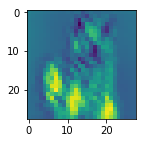

In [0]:
sample = out[0,1,:,:]
plt.figure(figsize = (2,2))
plt.imshow(sample.detach().numpy())
plt.show()

In [0]:
#Mean Pool or Avg pool
class avg_pool(nn.Module):
  def __init__(self):
    super(avg_pool,self).__init__()
    self.model = nn.Sequential(nn.Conv2d(3,10,3),
                              nn.Conv2d(10,5,3),
                              nn.AvgPool2d(2, stride = 2)) # Kernel size, Stride
    #Stride = 2 --> (2,2)
    
  def forward(self,x):
    y = self.model(x)
    return y

In [0]:
avg = avg_pool()
out = avg(images)
print(out.shape)

torch.Size([4, 5, 14, 14])


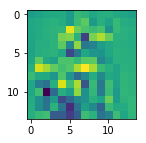

In [0]:
sample = out[0,1,:,:]
plt.figure(figsize = (2,2))
plt.imshow(sample.detach().numpy())
plt.show()

In [0]:
#Max Pool
class max_pool(nn.Module):
  def __init__(self):
    super(max_pool,self).__init__()
    self.model = nn.Sequential(nn.Conv2d(3,10,3),
                              nn.Conv2d(10,5,3),
                              nn.MaxPool2d(2, stride = 2)) # Kernel size, Stride
    #Stride = 2 --> (2,2)
    
  def forward(self,x):
    y = self.model(x)
    return y

In [0]:
max_p = max_pool()
out = max_p(images)
print(out.shape)

torch.Size([4, 5, 14, 14])


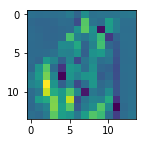

In [0]:
sample = out[0,1,:,:]
plt.figure(figsize = (2,2))
plt.imshow(sample.detach().numpy())
plt.show()